# import library

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import seaborn as sns


from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# import the data

In [8]:
import pandas as pd
train=pd.read_csv('train-v3.csv')
test=pd.read_csv('test-v3.csv')
valid=pd.read_csv('valid-v3.csv')
train1 = pd.concat([train, valid], axis=0).reset_index(drop=True)

# get a peak of the data

In [162]:
train.columns

Index(['id', 'price', 'sale_yr', 'sale_month', 'sale_day', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [43]:
train.head()

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.0,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.0,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.0,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.0,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.5,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503


# show the general idea of the data types

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15128 non-null  int64  
 1   price          15128 non-null  int64  
 2   sale_yr        15128 non-null  int64  
 3   sale_month     15128 non-null  int64  
 4   sale_day       15128 non-null  int64  
 5   bedrooms       15128 non-null  int64  
 6   bathrooms      15128 non-null  float64
 7   sqft_living    15128 non-null  int64  
 8   sqft_lot       15128 non-null  int64  
 9   floors         15128 non-null  int64  
 10  waterfront     15128 non-null  int64  
 11  view           15128 non-null  int64  
 12  condition      15128 non-null  int64  
 13  grade          15128 non-null  int64  
 14  sqft_above     15128 non-null  int64  
 15  sqft_basement  15128 non-null  int64  
 16  yr_built       15128 non-null  int64  
 17  yr_renovated   15128 non-null  int64  
 18  zipcod

In [ ]:

import sweetviz as sv

report = sv.analyze(train)
report.show_html()  # This will generate and open a new tab in your default web browser with the report

# summary statistics of the dataset

In [8]:
summary_statistics = train.describe()
summary_statistics

,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,1.512800e+04,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,1.512800e+04,15128.000000,15128.000000,...,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000
mean,5.362517e+05,2014.324233,6.565375,15.744712,3.363829,2.108226,2070.152168,1.489898e+04,1.441764,0.007866,...,3.413934,7.643707,1779.556716,290.595452,1970.903556,83.775251,47.559018,-122.214404,1979.610193,12741.161356
std,3.635529e+05,0.468103,3.113648,8.635169,0.937580,0.767692,916.666031,3.820881e+04,0.552684,0.088345,...,0.651868,1.166838,824.351531,441.960578,29.418170,400.254590,0.139170,0.141294,683.366943,27045.551041
min,7.500000e+04,2014.000000,1.000000,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,...,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.159300,-122.515000,399.000000,659.000000
25%,3.200000e+05,2014.000000,4.000000,8.000000,3.000000,1.500000,1420.000000,5.033750e+03,1.000000,0.000000,...,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.469300,-122.330000,1480.000000,5100.000000
50%,4.480000e+05,2014.000000,6.000000,16.000000,3.000000,2.250000,1900.000000,7.615000e+03,1.000000,0.000000,...,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,47.570300,-122.232000,1830.000000,7620.000000
75%,6.352125e+05,2015.000000,9.000000,23.000000,4.000000,2.500000,2532.500000,1.065000e+04,2.000000,0.000000,...,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,47.677600,-122.125000,2350.000000,10050.000000
max,7.062500e+06,2015.000000,12.000000,31.000000,33.000000,8.000000,13540.000000,1.024068e+06,3.000000,1.000000,...,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


# data visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您的数据集已经被加载到名为train的DataFrame中
# train = pd.read_csv('your_data_file.csv')

# 获取所有特征，除了'price'
features = [feature for feature in train.columns if feature != 'price']

# 对于每个特征，绘制一个与'price'的散点图
for feature in features:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=train, x=feature, y='price')
    plt.title(f'Scatter plot of price vs. {feature}')
    plt.show()



# feature engineering

In [12]:
# drop some unnecessary columns base on my common sense
train = train.drop('id',axis=1).drop('zipcode',axis=1)
train1 = train1.drop('id',axis=1).drop('zipcode',axis=1)
valid = valid.drop('id',axis=1).drop('zipcode',axis=1)
test = test.drop('id',axis=1).drop('zipcode',axis=1)

KeyError: "['id'] not found in axis"

In [10]:
# 把sqft_basement和yr_renovated转换为二值特征
train['sqft_basement'] = train['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
train['yr_renovated'] = train['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

train1['sqft_basement'] = train1['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
train1['yr_renovated'] = train1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

valid['sqft_basement'] = valid['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
valid['yr_renovated'] = valid['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

test['sqft_basement'] = test['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
test['yr_renovated'] = test['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# 可以考虑删除原始的sqft_basement和yr_renovated特征




In [11]:
# Calculate house age
def calculate_age(row):
    if row['yr_renovated'] == 0:
        return row['sale_yr'] - row['yr_built']
    else:
        return row['sale_yr'] - row['yr_renovated']

# Apply the function to calculate 'house_age' for all datasets
train['house_age'] = train.apply(calculate_age, axis=1)
train1['house_age'] = train1.apply(calculate_age, axis=1)
test['house_age'] = test.apply(calculate_age, axis=1)
valid['house_age'] = valid.apply(calculate_age, axis=1)

# Feature selection : correlation method

In [22]:
# check correlation between features, sorting by the Final column.
df_correlation = train.corr().abs().sort_values(by='price', ascending=False)
df_correlation

,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age
price,1.000000,0.007752,0.024029,0.008888,0.301817,0.521330,0.702100,0.101519,0.241054,0.266653,...,0.672523,0.601167,0.193246,0.057491,0.128819,0.309688,0.020066,0.586408,0.078428,0.122500
sqft_living,0.702100,0.021402,0.000472,0.004819,0.563715,0.751196,1.000000,0.199900,0.356204,0.108829,...,0.764135,0.877851,0.208327,0.321174,0.056509,0.057183,0.241130,0.757771,0.192312,0.031976
grade,0.672523,0.024184,0.004369,0.004275,0.357437,0.670199,0.764135,0.134900,0.471167,0.089190,...,1.000000,0.756418,0.058567,0.453137,0.010159,0.118662,0.200529,0.717157,0.119376,0.023393
sqft_above,0.601167,0.021474,0.002046,0.000539,0.471012,0.683281,0.877851,0.209318,0.517587,0.072992,...,0.756418,1.000000,0.205214,0.426661,0.025436,0.002178,0.345984,0.731262,0.198562,0.006331
sqft_living15,0.586408,0.017867,0.005913,0.000844,0.383713,0.571972,0.757771,0.160086,0.297821,0.092290,...,0.717157,0.731262,0.050657,0.326640,0.005348,0.052141,0.329827,1.000000,0.189088,0.018571
bathrooms,0.521330,0.015368,0.007158,0.000282,0.506150,1.000000,0.751196,0.111547,0.525690,0.061259,...,0.670199,0.683281,0.166713,0.517302,0.050659,0.023491,0.229700,0.571972,0.098087,0.011505
view,0.404273,0.000529,0.007785,0.011097,0.081847,0.192763,0.294801,0.080008,0.025428,0.412017,...,0.259589,0.172099,0.193187,0.050330,0.107850,0.008133,0.077312,0.289343,0.073464,0.109833
lat,0.309688,0.026338,0.007777,0.003930,0.011471,0.023491,0.057183,0.098030,0.036589,0.017276,...,0.118662,0.002178,0.144824,0.143039,0.013484,1.000000,0.141997,0.052141,0.091305,0.023559
bedrooms,0.301817,0.001494,0.010604,0.002956,1.000000,0.506150,0.563715,0.043723,0.158787,0.006144,...,0.357437,0.471012,0.155362,0.158293,0.016700,0.011471,0.134836,0.383713,0.035662,0.004757
waterfront,0.266653,0.002698,0.001807,0.007933,0.006144,0.061259,0.108829,0.030690,0.021848,1.000000,...,0.089190,0.072992,0.043057,0.029447,0.111225,0.017276,0.049375,0.092290,0.034915,0.111906


In [23]:
# extract all indices where the correlation with "price" is greater than 0.1 or smaller than -0.1
selected_indices = df_correlation[(df_correlation["price"] >= 0.15)].index
selected_indices
# = selected_indices[1:]

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'lat', 'bedrooms', 'waterfront', 'floors',
       'sqft_basement'],
      dtype='object')

# Feature selection : variance threshold method

In [24]:

# Use the variance threshold method to select the features, and select a threshold value in the range of 20 to 30 
variance_df = VarianceThreshold(threshold=25)
variance_df.fit(train)
pd.DataFrame({'Variance': variance_df.variances_, 'select_status': variance_df.get_support()}, index=train.columns)


,Variance,select_status
price,1.345935e+11,True
sale_yr,2.184977e-01,False
sale_month,9.657623e+00,False
sale_day,7.429014e+01,True
bedrooms,8.856458e-01,False
bathrooms,5.856082e-01,False
sqft_living,8.451488e+05,True
sqft_lot,1.501594e+09,True
floors,3.042695e-01,False
waterfront,7.956033e-03,False


In [25]:
variance_indices = train.columns[variance_df.get_support()]

In [26]:
variance_indices

Index(['price', 'sale_day', 'sqft_living', 'sqft_lot', 'sqft_above',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'house_age'],
      dtype='object')

# Feature selection : select K best

In [27]:
# Select the value of k between six to eight.
k = 10

# Create a SelectKBest object and fit it to the data using f_regression
kbest_selector = SelectKBest(score_func=f_regression, k=k)
selected_features_kbest = kbest_selector.fit_transform(train.drop('price', axis=1),train['price'].copy())

# Get the column indices of the selected features
selected_feature_indices_kbest = kbest_selector.get_support(indices=True)

# Create a new dataframe with the selected features
selectKbest_df = train.iloc[:, selected_feature_indices_kbest].copy()

In [28]:
selectKbest_indices = train.iloc[:, selected_feature_indices_kbest].columns

In [29]:
selectKbest_indices

Index(['sale_day', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'yr_renovated', 'long'],
      dtype='object')

In [30]:
feature=list(set(list(selected_indices) + list(selectKbest_indices) + list(variance_indices)))

In [32]:
feature

['house_age',
 'bedrooms',
 'yr_renovated',
 'grade',
 'view',
 'sqft_living15',
 'yr_built',
 'sqft_living',
 'price',
 'sqft_basement',
 'long',
 'sale_day',
 'sqft_above',
 'sqft_lot',
 'condition',
 'floors',
 'lat',
 'sqft_lot15',
 'waterfront',
 'bathrooms']

In [33]:
#feature.remove('geo_cluster')
# 删除sqft_lot15，因为与sqft_lot高度相关
feature.remove('sqft_lot15')
#feature.remove('zipcode')
#feature.remove('sqft_living15')
#feature.remove('id')
#feature.remove('long')

In [34]:
feature.remove('price')
train_X=train.drop('price',axis=1)[feature]
train_Y=train['price']
valid_X=valid.drop('price',axis=1)[feature]
valid_Y=valid['price']

In [35]:
train1_X=train1.drop('price',axis=1)[feature]
train1_Y=train1['price']

# 不用Normalization

# 生成testing feature

In [ ]:
# Step 2: Create an EntitySet
es = ft.EntitySet('house_data')  # Creating EntitySet



es = es.entity_from_dataframe(entity_id='houses', dataframe=test, index='house_id')



# 步驟4：自動特徵生成
feature_matrix_test, feature_defs = ft.dfs(entityset=es, target_entity="houses",
                            
                                       agg_primitives=["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"],
                                      trans_primitives=['add_numeric', 'multiply_numeric'],
                                      max_depth=1,
                                      verbose=1)


# Light GBM

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import featuretools as ft
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold as kf
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设您已经有一个数据集df和目标变量为'y'
# df = ... # 加载或创建您的数据集
# y = df['price'] # 或您的目标变量名称
# X = df.drop('price', axis=1) # 删除目标变量以获得特征

# 将数据分为训练集和测试集
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置模型参数
params = {
    'boosting_type': 'dart',
    'objective': 'regression',
    'num_leaves': 37,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'learning_rate': 0.05,
    'n_estimators': 2000,
    'colsample_bytree': 0.8,
    'colsample_bynode': 1,
    'min_split_gain': 0.0,
    'n_jobs': -1,
    'bagging_fraction': 1,
    'max_bin': 700,
    'num_iterations': 2000,
    'metric': 'l2', # 使用平均平方误差作为评估指标
    'reg_alpha': 12,
    'reg_lambda': 12,
    'verbose':1
}
#assert university_df['學校代碼'].is_unique and university_df['學校代碼'].notna().all()

# Step 2: Create an EntitySet
es = ft.EntitySet('house_data')  # Creating EntitySet



es = es.entity_from_dataframe(entity_id='houses', dataframe=train1.drop(columns=['price']), index='house_id')



# 步驟4：自動特徵生成
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity="houses",
                            
                                       agg_primitives=["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"],
                                      trans_primitives=['add_numeric', 'multiply_numeric'],
                                      max_depth=1,
                                      verbose=1)
from featuretools.selection import remove_low_information_features, remove_highly_null_features

#feature_matrix_selected = remove_low_information_features(feature_matrix)
#feature_matrix_selected = remove_highly_null_features(feature_matrix_selected)
X = feature_matrix  # 單價是目標變數
y = train1['price']
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    X[col] = X[col].astype('category')
#categorical_columns.append('geo_cluster')
lgbm = lgb.LGBMRegressor(**params)
lgbm.fit(X, y)
y_pred = lgbm.predict(feature_matrix_test)


Built 441 features
Elapsed: 00:00 | Progress: 100%|██████████
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.847325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174690
[LightGBM] [Info] Number of data points in the train set: 15128, number of used features: 441
[LightGBM] [Info] Start training

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import featuretools as ft
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold as kf
#assert university_df['學校代碼'].is_unique and university_df['學校代碼'].notna().all()

# Step 2: Create an EntitySet
es = ft.EntitySet('house_data')  # Creating EntitySet



es = es.entity_from_dataframe(entity_id='houses', dataframe=train1.drop(columns=['price']), index='house_id')



# 步驟4：自動特徵生成
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity="houses",
                            
                                       agg_primitives=["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"],
                                      trans_primitives=['add_numeric', 'multiply_numeric'],
                                      max_depth=1,
                                      verbose=1)
from featuretools.selection import remove_low_information_features, remove_highly_null_features

#feature_matrix_selected = remove_low_information_features(feature_matrix)
#feature_matrix_selected = remove_highly_null_features(feature_matrix_selected)
X = feature_matrix  # 單價是目標變數
y = train1['price']
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_columns)
#categorical_columns.append('geo_cluster')
import xgboost as xgb
xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.35, learning_rate = 0.05,
                max_depth = 6, alpha = 9.5, n_estimators = 2000,reg_lambda=10,verbose=1)
mae_scores = []  # List to store the Mean Absolute Error for each fold

xg_boost_model.fit(X, y)
xg_y_predicted = xg_boost_model.predict(feature_matrix_test)

NameError: name 'train2_X' is not defined

# CAT BOOST

In [74]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import featuretools as ft
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold as kf
#assert university_df['學校代碼'].is_unique and university_df['學校代碼'].notna().all()

# Step 2: Create an EntitySet
es = ft.EntitySet('house_data')  # Creating EntitySet



es = es.entity_from_dataframe(entity_id='houses', dataframe=train1.drop(columns=['price']), index='house_id')



# 步驟4：自動特徵生成
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity="houses",
                            
                                       agg_primitives=["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"],
                                      trans_primitives=['add_numeric', 'multiply_numeric'],
                                      max_depth=1,
                                      verbose=1)
from featuretools.selection import remove_low_information_features, remove_highly_null_features

feature_matrix = remove_low_information_features(feature_matrix)
feature_matrix = remove_highly_null_features(feature_matrix)
X = feature_matrix  # 單價是目標變數
y = train1['price']
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
#categorical_columns.append('geo_cluster')
cat = CatBoostRegressor(subsample=1,verbose=1,od_type='IncToDec', learning_rate= 0.05, iterations=1900, early_stopping_rounds=30, min_data_in_leaf=1000,l2_leaf_reg=0.85,depth=7,colsample_bylevel=0.8,boosting_type='Plain')


Built 441 features
Elapsed: 00:00 | Progress: 100%|██████████
0:	learn: 353633.2253752	total: 19.8ms	remaining: 37.6s
1:	learn: 342363.6207299	total: 40.6ms	remaining: 38.5s
2:	learn: 331099.4219927	total: 65.9ms	remaining: 41.7s
3:	learn: 320838.1230574	total: 86.8ms	remaining: 41.1s
4:	learn: 311089.6678093	total: 112ms	remaining: 42.4s
5:	learn: 301993.2963212	total: 131ms	remaining: 41.5s
6:	learn: 292475.0757368	total: 157ms	remaining: 42.4s
7:	learn: 283364.5823523	total: 176ms	remaining: 41.7s
8:	learn: 275503.6406008	total: 206ms	remaining: 43.3s
9:	learn: 267570.1738255	total: 227ms	remaining: 42.8s
10:	learn: 260163.0135295	total: 254ms	remaining: 43.6s
11:	learn: 253369.1892574	total: 277ms	remaining: 43.6s
12:	learn: 246545.5211456	total: 300ms	remaining: 43.6s
13:	learn: 240135.1519746	total: 323ms	remaining: 43.5s
14:	learn: 233936.3338651	total: 349ms	remaining: 43.8s
15:	learn: 228416.8044256	total: 368ms	remaining: 43.3s
16:	learn: 222913.4971635	total: 394ms	remaining

In [ ]:
cat.fit(X, y, cat_features=categorical_columns)


In [80]:
cat_predicted = cat.predict(feature_matrix_test)


6485

# 通過grid search 和random search 找出最適合三個模型的超參數

In [69]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Model initialization
model = CatBoostRegressor(verbose=0,early_stopping_rounds=30)  # Setting verbose=0 to not print training progress for each iteration

# Parameter distribution
param_dist = {
    'depth': [6, 7, 8],
    'learning_rate': [0.03,0.05,0.07],
    'iterations': [1300,1500,1700,2000],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'od_type': ['IncToDec', 'Iter'],
    'early_stopping_rounds':[10, 15,20,30],
    'subsample':[0.6, 0.7, 0.8, 0.9, 1.0],
    'min_data_in_leaf': [10,20,30],

    'colsample_bylevel': [0.8,1,1.5],
    'boosting_type': ['Ordered', 'Plain'],
    # ... add other parameters as desired
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, 
                                   n_iter=20, 
                                   scoring='neg_mean_absolute_error',
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=1, 
                                   random_state=42)
random_search.fit(train_X, train_Y)  

#predicting for the price
y_pred = random_search.predict(valid_X) 

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)  

# Evaluate the model 
print("Mean Squared Error: %.3f" % mean_absolute_error(valid_Y, y_pred))  


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [            nan -66681.66470236 -68593.53368595 -65121.60494835
             nan             nan             nan -65015.11841916
             nan -68593.53368595 -64799.77070361             nan
 -72502.17723663 -66170.562747               nan             nan
             nan             nan -70043.46482195 -67044.53749644]
  category=UserWarning


Best hyperparameters: {'subsample': 0.7, 'od_type': 'Iter', 'min_data_in_leaf': 10, 'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 2000, 'early_stopping_rounds': 15, 'depth': 8, 'colsample_bylevel': 0.8, 'boosting_type': 'Plain'}
Mean Squared Error: 60433.032


In [ ]:
Best hyperparameters: {'od_type': 'Iter', 'learning_rate': 0.5, 'l2_leaf_reg': 3, 'iterations': 300, 'early_stopping_rounds': 50, 'depth': 5}
68081
Best hyperparameters: {'od_type': 'IncToDec', 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'early_stopping_rounds': 20, 'depth': 7}
Mean Squared Error: 61822.501
    
Best hyperparameters: {'od_type': 'Iter', 'learning_rate': 0.1, 'l2_leaf_reg': 9, 'iterations': 1500, 'early_stopping_rounds': 20, 'depth': 8}
Mean Squared Error: 61873.098
    
Best hyperparameters: {'od_type': 'Iter', 'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 7}
Mean Squared Error: 61882.853

# XG boost

In [ ]:
xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.55,eta=0.35, learning_rate = 0.05,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)
real loss 66385

xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7,eta=0.35, learning_rate = 0.05,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)
fake loss 21415


xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8,eta=0.35, learning_rate = 0.05,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)

fake 21343

xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9,eta=0.35, learning_rate = 0.05,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)

fake 20738

xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.35, learning_rate = 0.05,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)
fake 20441 real66023

xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.35, learning_rate = 0.1,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)
fake 8598 no

xg_boost_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.35, learning_rate = 0.055,
                max_depth = 7, alpha = 9.5, n_estimators = 2000,reg_lambda=10)
fake 18682

# 

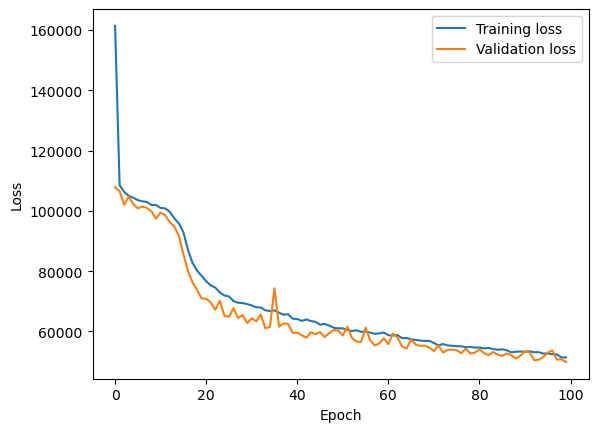

In [77]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
import numpy as np

# 模型的loss
loss_model = 61883
loss_xg = 63124
loss_model1 = 61606

# 根据loss计算权重
weight_model = 1 / loss_model
weight_xg = 1 / loss_xg
weight_model1 = 1 / loss_model1

# 将权重标准化，使它们的和为1
sum_weights = weight_model+ weight_model1
weight_model /= sum_weights
weight_xg /= sum_weights
weight_model1 /= sum_weights
weighted_avg_prediction = (y_pred * weight_model  +cat_predicted * weight_model1)

weighted_avg_prediction

array([707703.65473281, 741635.88755142, 501236.45070904, ...,
       316677.38192891, 407179.89003994, 203313.93067164])

In [73]:
import pandas as pd

# Sample data (replace this with your actual IDs)
ids = list(range(1, 6486)) # ... and so on

# Convert your predictions to a flat list
prices = weighted_avg_prediction.flatten().tolist()

# Create a DataFrame
df = pd.DataFrame({
    'id': ids,
    'price': prices
})

# Save to CSV
df.to_csv("submission.csv", index=False)
